In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:

data = pd.read_csv('./Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
# Eliminamos del conjunto de datos la primer columna que contiene datos que no son útiles
data = data.iloc[:, 1:]

In [8]:

data.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:

data.describe()
     

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:

data.columns
     

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

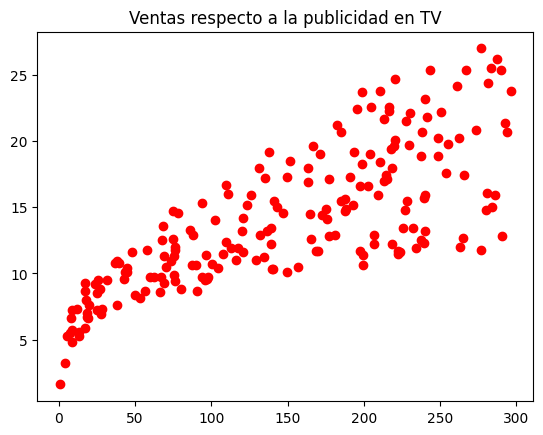

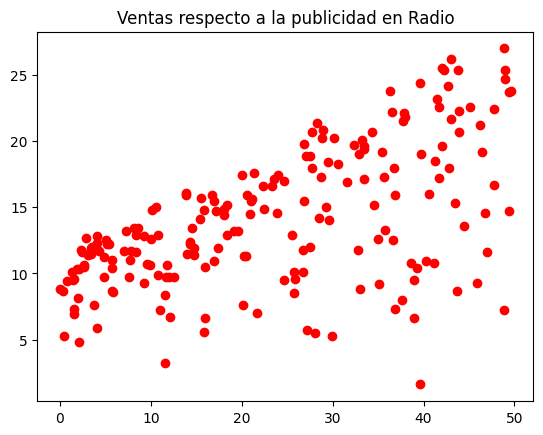

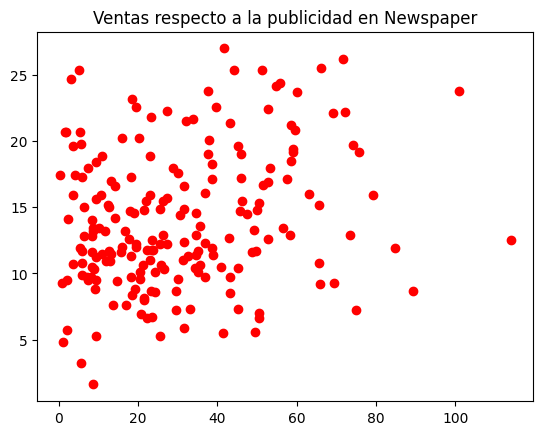

In [11]:

cols = ['TV', 'Radio', 'Newspaper']

for col in cols:
  plt.plot(data[col], data['Sales'], 'ro')
  plt.title('Ventas respecto a la publicidad en %s' % col)
  plt.show()

In [14]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Utilizamos .values.reshape(-1,1) porque scikit-learn espera que las características de entrada para el modelo de regresión sean una matriz bidimensional, donde cada fila representa una observación y cada columna representa una característica.

In [12]:

X = data['TV'].values.reshape(-1,1)
y = data['Sales'].values
     

In [15]:

# Dividimos el conjunto entre el conjunto de entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:

# Entrenamiento del modelo lineal con los datos
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [17]:

# Predicción de los valores utilizando el modelo
y_pred = lin_reg.predict(X_test)
print('Predicciones: {}, valores reales: {}'.format(y_pred[:4], y_test[:4]))

Predicciones: [14.71794394 16.2115484  20.74819743  7.66403631], valores reales: [16.9 22.4 21.4  7.3]


Predicciones: [14.71794394 16.2115484  20.74819743  7.66403631], valores reales: [16.9 22.4 21.4  7.3]
RMSE nos indica cuánto varían en promedio las predicciones del modelo con respecto a los valores reales. Un valor más bajo de RMSE indica una mejor precisión del modelo, ya que significa que las predicciones están más cercanas a los valores reales.

Para poder entender el valor de RMSE debemos de entender primero la escala de los valores con los que estamos trabajando, en este caso nos estamos trabajando con los valores de la columna Sales. En el caso del valor RMSE del modelo tomando en cuenta la variable independiente TV vemos que el valor mínimo en la columna Sales es significativamente menor que el RMSE. Esto indica que, en promedio las predicciones tienen un error considerable en comparación con el rango de los datos. En estos casos es útil entender por qué el modelo tiene dificultades para hacer predicciones precisas, especialmente si el error absoluto es grande en relación con los valores mínimos de Sales.

El parámetro squared = False indica que la función debería devolver la raíz cuadrada del error cuadrático medio en lugar del propio error cuadrático medio. Esto es específico para el cálculo del RMSE en lugar del MSE. Si se omite o se establece en True (que es el valor por defecto), devolverá el MSE.

In [18]:
r_squared = lin_reg.score(X_test, y_test) # R^2

rmse = mean_squared_error(y_test, y_pred, squared=False) #RMSE

print(r_squared, rmse)

0.6766954295627076 3.194472431998898


In [19]:

r2_score(y_test, y_pred) # R^2

0.6766954295627076

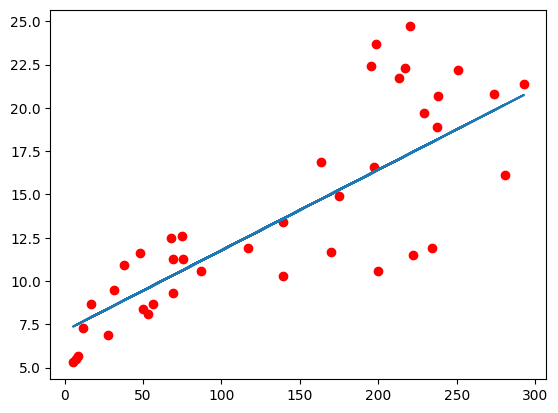

In [20]:

# Gráfico de los datos de test contra el modelo
plt.plot(X_test, y_test, 'ro')
plt.plot(X_test, y_pred.reshape(-1,1))
plt.show()

In [21]:
def modelos_simple(independiente):
  X = data[independiente].values.reshape(-1,1)
  y = data['Sales'].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  lin_reg = LinearRegression()
  lin_reg.fit(X_train, y_train)
  y_pred = lin_reg.predict(X_test)

  print('Predicciones: {}, valores reales: {}'.format(y_pred[:4], y_test[:4]))

  r_squared = lin_reg.score(X_test, y_test) # R^2
  rmse = mean_squared_error(y_test, y_pred, squared=False) #RMSE
  print('R2', r_squared, "RMSE", rmse)

  print('R2', r2_score(y_test, y_pred))

  plt.plot(X_test, y_test, 'ro')
  plt.plot(X_test, y_pred.reshape(-1,1))
  plt.show()

Predicciones: [15.88332197 19.17427219 15.20877938 16.96667826], valores reales: [16.9 22.4 21.4  7.3]
R2 0.2634309396999791 RMSE 4.8216974799471926
R2 0.2634309396999791


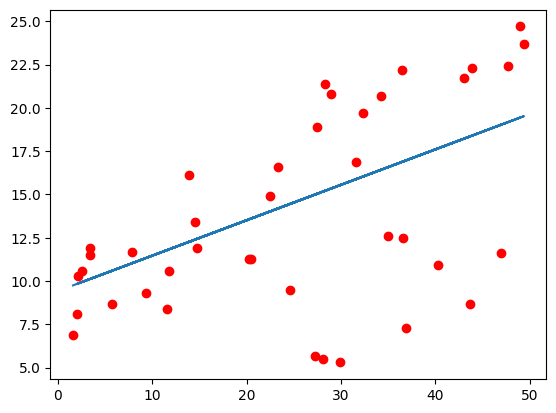

In [22]:
# Modelo de Radio
modelos_simple('Radio')

Predicciones: [15.47167765 15.47167765 14.89203768 15.01155108], valores reales: [16.9 22.4 21.4  7.3]
R2 0.029871749149522397 RMSE 5.533600454969853
R2 0.029871749149522397


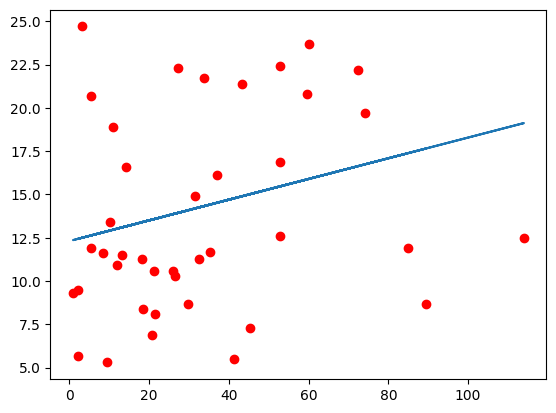

In [23]:
# Modelo de Newspaper
modelos_simple('Newspaper')

Los resultados obtenidos por cada uno de los modelos son los siguientes:

TV: R2: 0.6766954295627076 RMSE: 3.194472431998898
Radio: R2: 0.2634309396999791 RMSE: 4.8216974799471926
Periodico: R2: 0.029871749149522397 RMSE: 5.533600454969853
Con base a los resultados podemos decir que el mejor modelo cuando utilizamos una sola variable independiente es el de TV, seguido por el de Radio y el que peor rendimiento muestra es el de Periódico.

Conociendo los resultados de los modelos podemos ahora a la creación del modelo de regresión lineal múltiple haciendo distintas combinaciones de las variables del conjunto, con esta combinación de variables veremos si podemos conseguir un modelo que tenga un mejor rendimiento con los datos que se tienen.